# The Model-Driven Engineering Paradigm for Quantum Algorithms: Bridging Heterogeneity Across Quantum Computing Platforms

## VQE with Quantum Gate Based Model 

In [1]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms import VQE
import pylab
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer.primitives import Estimator as AerEstimator

## 4-qubit system with "full" entangled ansatz 

In [23]:
hamil = SparsePauliOp(['ZZII', 'ZIZI','IZZI','IIZZ','IZIZ', 'ZIIZ' , 'ZIII','IZII', 'IIZI','IIIZ'],coeffs=[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.])

In [24]:

# Finding the exact value  for 
numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=hamil)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

Reference value: -2.00000


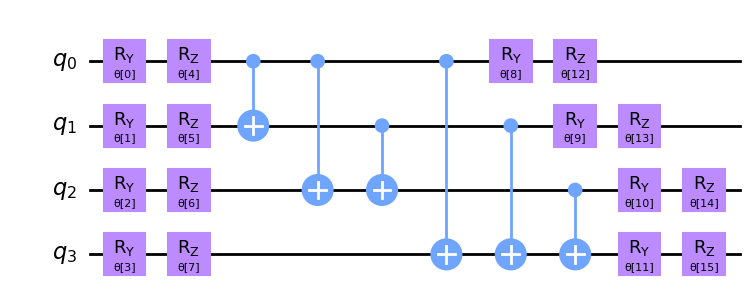

In [25]:
iterations = 300
ansatz = EfficientSU2(hamil.num_qubits,entanglement='full', reps=1)
spsa = SPSA(maxiter=iterations)
ansatz.decompose().draw('mpl')

In [26]:
# define callback
# note: Re-run this cell to restart lists before training
counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

In [27]:
seed = 170
algorithm_globals.random_seed = seed

noiseless_estimator = AerEstimator(
    run_options={"seed": seed, "shots": 1024},
    transpile_options={"seed_transpiler": seed},
)

In [28]:
vqe = VQE(
    noiseless_estimator, ansatz, optimizer=spsa, callback=store_intermediate_result
)
result = vqe.compute_minimum_eigenvalue(operator=hamil)

print(f"VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}")
print(
    f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}"
)

VQE on Aer qasm simulator (no noise): -2.00000
Delta from reference energy value is 0.00000


Text(0.5, 1.0, 'Full-entangled Ansatz - 4 Qubit')

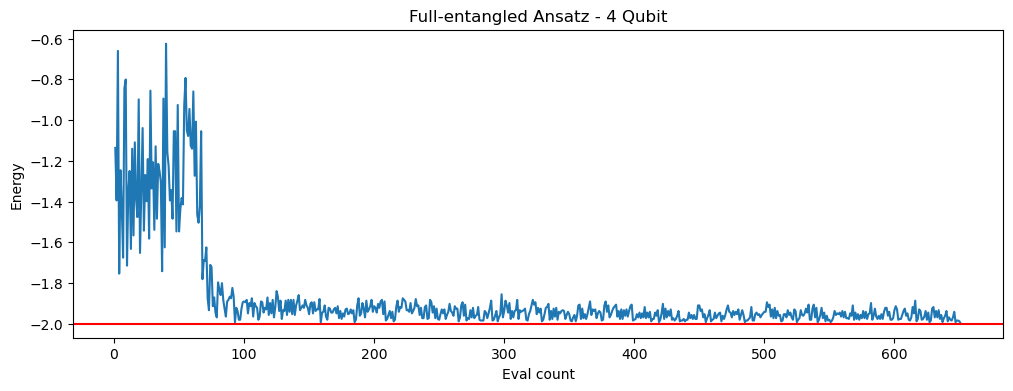

In [29]:
pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts, values)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.axhline(y = ref_value, color = 'r', linestyle = '-') 
pylab.title("Full-entangled Ansatz - 4 Qubit")

In [9]:
len(counts)

651

## 4-qubit system with "linear" entangled ansatz 

In [12]:
hamil = SparsePauliOp(['ZZII', 'IZZI','IIZZ', 'ZIII','IZII', 'IIZI','IIIZ'],coeffs=[1.,1.,1.,1.,1.,1.,1.])

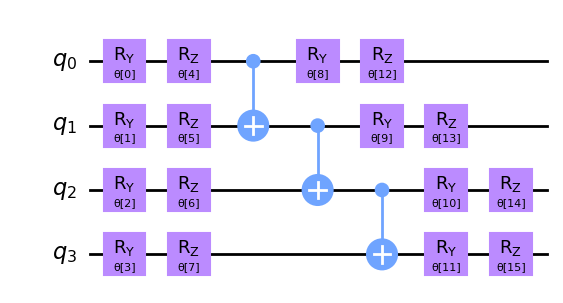

In [13]:
iterations = 300
ansatz_linear = EfficientSU2(hamil.num_qubits,entanglement='linear', reps=1)
spsa = SPSA(maxiter=iterations)
ansatz_linear.decompose().draw('mpl')

In [14]:
# define callback
# note: Re-run this cell to restart lists before training
counts_lin = []
values_lin = []

def store_intermediate_result_lin(eval_count, parameters, mean, std):
    counts_lin.append(eval_count)
    values_lin.append(mean)

In [15]:
vqe = VQE(
    noiseless_estimator, ansatz_linear, optimizer=spsa, callback=store_intermediate_result_lin
)
result = vqe.compute_minimum_eigenvalue(operator=hamil)

print(f"VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}")
print(
    f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}"
)

VQE on Aer qasm simulator (no noise): -3.00000
Delta from reference energy value is 1.00000


Text(0.5, 1.0, 'Linear-entangled Ansatz')

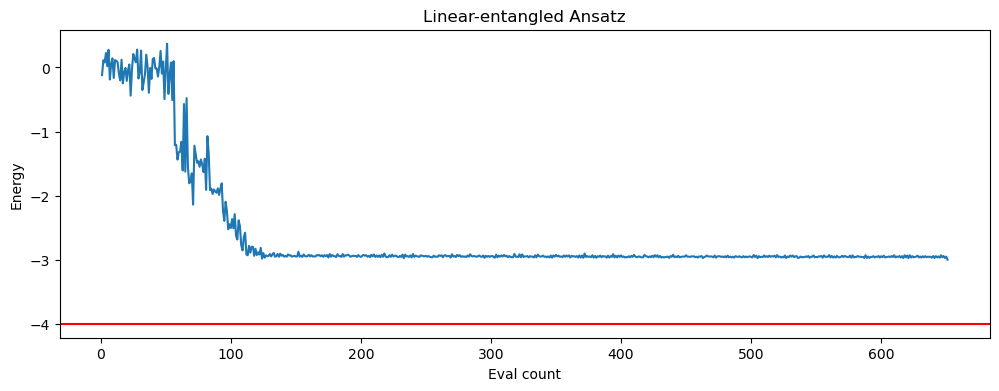

In [16]:
pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts_lin, values_lin)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.axhline(y = ref_value, color = 'r', linestyle = '-') 
pylab.title("Linear-entangled Ansatz")

## 4-qubit system with "circular" entangled ansatz 

In [17]:
hamil = SparsePauliOp(['ZZII', 'IZZI','IIZZ', 'ZIIZ' , 'ZIII','IZII', 'IIZI','IIIZ'],coeffs=[1.,1.,1.,1.,1.,1.,1.,1.])

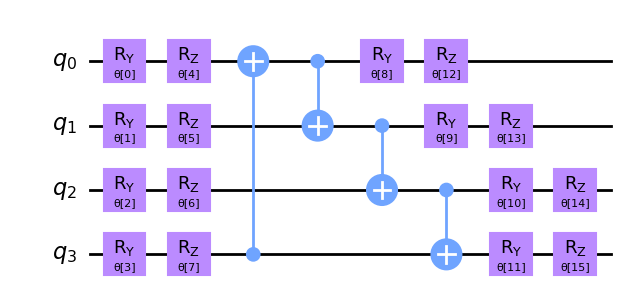

In [18]:
iterations = 300
ansatz_circ = EfficientSU2(hamil.num_qubits,entanglement='circular', reps=1)
spsa = SPSA(maxiter=iterations)
ansatz_circ.decompose().draw('mpl')

In [19]:
# define callback
# note: Re-run this cell to restart lists before training
counts_circ = []
values_circ = []

def store_intermediate_result_circ(eval_count, parameters, mean, std):
    counts_circ.append(eval_count)
    values_circ.append(mean)

In [20]:
vqe = VQE(
    noiseless_estimator, ansatz_circ, optimizer=spsa, callback=store_intermediate_result_circ
)
result = vqe.compute_minimum_eigenvalue(operator=hamil)

print(f"VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}")
print(
    f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}"
)

VQE on Aer qasm simulator (no noise): -3.63086
Delta from reference energy value is 0.36914


Text(0.5, 1.0, 'Circular-entangled Ansatz')

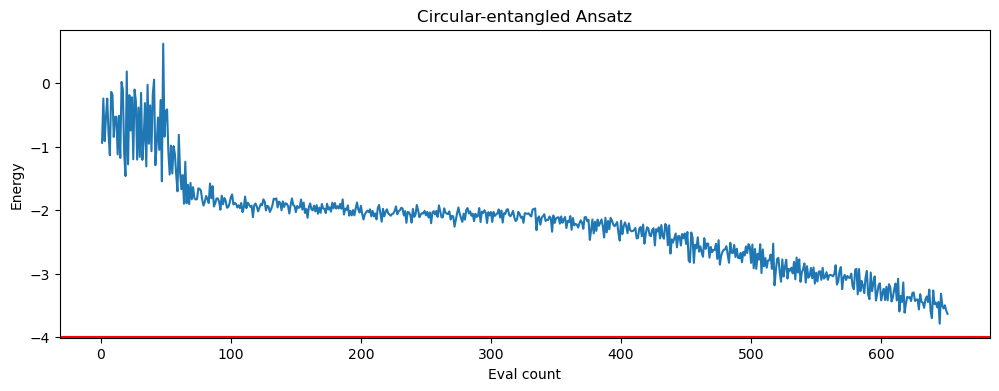

In [21]:
pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts_circ, values_circ)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.axhline(y = ref_value, color = 'r', linestyle = '-') 
pylab.title("Circular-entangled Ansatz")

#   DWAVE- Quantum Annealing 

In [2]:
!pip install --upgrade dwave-ocean-sdk
!pip install dwave-inspector
!pip install dwave-inspectorapp --extra-index=https://pypi.dwavesys.com/simple

Looking in indexes: https://pypi.org/simple, https://pypi.dwavesys.com/simple


## DWAVE Circular-entangled model

In [1]:
#DWAVE Circular-entangled model 
import os
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector



# Define the Ising model parameters
h = {0: 1, 1: 1, 2: 1, 3: 1}  # external magnetic fields
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 0): 1}  # coupler biases between qubits

# Get a sampler that can solve Ising models
sampler_1 = EmbeddingComposite(DWaveSampler())

# Sample the Ising model
sampleset_1 = sampler_1.sample_ising(h, J, num_reads=100)

# Use the D-Wave Inspector to visualize the problem and the solution
dwave.inspector.show(sampleset_1)

# Find and print the ground state energy
# The lowest energy sample is considered the ground state
ground_state_energy = sampleset_1.first.energy
print("Ground State Energy:", ground_state_energy)

# Optionally, print the sample corresponding to the ground state
ground_state_sample = sampleset_1.first.sample
print("Ground State Sample:", ground_state_sample)


ValueError: API token not defined

## DWAVE Linear-entangled model

In [ ]:
#DWAVE linear-entangled ising model 

from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

# Define the Ising model parameters for a linear chain
h = {0: 1, 1: 1, 2: 1, 3: 1}  # external magnetic fields
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1}  # coupler biases between qubits, linearly entangled

# Get a sampler that can solve Ising models
sampler = EmbeddingComposite(DWaveSampler())

# Sample the Ising model
sampleset = sampler.sample_ising(h, J, num_reads=100)

# Use the D-Wave Inspector to visualize the problem and the solution
dwave.inspector.show(sampleset)
# Find and print the ground state energy

# The lowest energy sample is considered the ground state
ground_state_energy = sampleset.first.energy
print("Ground State Energy:", ground_state_energy)

# Optionally, print the sample corresponding to the ground state
ground_state_sample = sampleset.first.sample
print("Ground State Sample:", ground_state_sample)


## DWAVE Full-entangled model

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dwave.inspector
import os
# Set the D-Wave API token

# Define the Ising model parameters for full entanglement

ising_parameters=[h,J]
h = {0: 1, 1: 1, 2: 1, 3: 1}  # external magnetic fields
J = {
    (0, 1): 1, (0, 2): -1, (0, 3): -1,  # coupler biases between qubit 0 and others
    (1, 2): 1, (1, 3): 1,            # coupler biases between qubit 1 and others (2, 3)
    (2, 3): 1                        # coupler bias between qubit 2 and 3
}  # Fully entangled model with all qubits interacting
ising_parameters_dwave=[h,J]
# Get a sampler that can solve Ising models

sampler = EmbeddingComposite(DWaveSampler(token='DEV-f74a9e03362957010ecbf6a87a746477f7c6a61a'))

# Sample the Ising model
sampleset = sampler.sample_ising(h, J, num_reads=100)

# Use the D-Wave Inspector to visualize the problem and the solution
dwave.inspector.show(sampleset)

# Find and print the ground state energy
# The lowest energy sample is considered the ground state
ground_state_energy = sampleset.first.energy
print("Ground State Energy:", ground_state_energy)

# Optionally, print the sample corresponding to the ground state
ground_state_sample = sampleset.first.sample
print("Ground State Sample:", ground_state_sample)


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/Users/furkanpolat/anaconda3/envs/isingmodel/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/Users/furkanpolat/anaconda3/envs/isingmodel/lib/python3.10/site-packages/dwave/inspector/server.py", line 158, in run
    self.server.serve_forever()
  File "/Users/furkanpolat/anaconda3/envs/isingmodel/lib/python3.10/site-packages/dwave/inspector/server.py", line 144, in server
    self._server = self._make_server()
  File "/Users/furkanpolat/anaconda3/envs/isingmodel/lib/python3.10/site-packages/dwave/inspector/server.py", line 132, in _make_server
    return self._safe_make_server(self.host, self.base_port, self.app)
  File "/Users/furkanpolat/anaconda3/envs/isingmodel/lib/python3.10/site-packages/dwave/inspector/server.py", line 108, in _safe_make_server
    return make_server(host, port, app,
  File "/Users/furkanpolat/anaconda3/envs/isingmodel/lib/python3.10/wsgiref/simple_server.

OSError: [Errno 48] Address already in use

In [1]:
import re
from qiskit import Aer
from qiskit.opflow import I, Z
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import SPSA
from qiskit.algorithms import VQE
from qiskit.utils import QuantumInstance

# Sample input from D-Wave settings as a string (for example purposes)
dwave_code = """
# Define the Ising model parameters
h = {0: 1, 1: 1, 2: 1, 3: 1}  # external magnetic fields
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 0): 1}  # coupler biases between qubits
"""

# Function to parse the h and J from the given D-Wave code snippet
def parse_dwave_settings(code):
    h = eval(re.findall(r"h = ({.*?})  # external magnetic fields", code)[0])
    J = eval(re.findall(r"J = ({.*?})  # coupler biases between qubits", code)[0])
    return h, J

# Determine if the entanglement is circular or linear based on J
def determine_entanglement_type(J):
    keys = list(J.keys())
    if (len(keys) == len(set([k for sub in keys for k in sub])) - 1):
        return 'linear'
    else:
        return 'circular'

h, J = parse_dwave_settings(dwave_code)
entanglement_type = determine_entanglement_type(J)

# Construct the Hamiltonian for the Ising model
paulis = [(Z(i) * Z(j)) for i, j in J]
field = [h[i] * Z(i) for i in h]
hamiltonian = sum(paulis + field, start=0 * I(0))

# Setup the quantum instance (simulator)
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend)

# Define the ansatz with determined entanglement
ansatz = EfficientSU2(num_qubits=len(h), entanglement=entanglement_type, reps=1)

# Define the optimizer
optimizer = SPSA(maxiter=300)

# Setup and run VQE
vqe = VQE(ansatz, optimizer, quantum_instance=quantum_instance)
result = vqe.compute_minimum_eigenvalue(operator=hamiltonian)

# Output results
print(f"Entanglement Type: {entanglement_type}")
print("Ground State Energy (VQE):", result.eigenvalue.real)


ImportError: cannot import name 'Aer' from 'qiskit' (/Users/furkanpolat/anaconda3/envs/isingmodel/lib/python3.10/site-packages/qiskit/__init__.py)